# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import requests
from bs4 import BeautifulSoup
import os
#from matplotlib.venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Introduction

This data project aims to understand how the crime has evolved in Denmark from 2008 to 2022 by municipality. The data chosen was downloaded from Danmarks Statistik. The crime reported constitutes all offences under the danish criminal code but not those under the danish traffic law.

The project starts by uploading two datasets: total number of crime by municipality (criminality) and total population by municipality (pop). These datasets were downladed in excel format and quartely information.

Cleaning the datasets consisted by removing columns and rows with no information, changing the names of the variables to not have names starting with a number and aggregating the values of criminality by year, and leaving only the last information of population of each year (quaerter 4). The frist approach to the data consistented on cheching the development of the mean of both variables.

After, we merged the dataset using a left method and created a crime index measurement. This index is created doing:

$$
index =  \frac{crim * 100.000}{pop}
$$



# Read and clean data

Import your data, either through an API or manually, and load it. 

In [392]:
# Uploading our excel datasets (criminalitydata and population) and visualizing the first 5 rows
criminality = 'data/criminalitydata.xlsx'
criminality = pd.read_excel(criminality, skiprows=2)

pop = 'data/population.xlsx'
pop = pd.read_excel(pop, skiprows=2)

In [393]:
# Cleaning the data
# Deleting the column that has no information
data = [criminality, pop]
for i in data:
    i.drop("Unnamed: 0", axis = 1, inplace = True)

# Deleting the rows that has no informtion in the criminality dataset
criminality.drop(index = 101, inplace=True)
criminality.drop(index = 100, inplace=True)

In [394]:
# Renaming the "Unnamed: 1" to municipalities
for i in data:
    i.rename(columns = {"Unnamed: 1" : "municipalities"}, inplace=True)


# Renaming the rest of the columns in both databases so that they don't start with a number
for n,i in enumerate(data):
    for h in range(2007, 2022+1):
        for j in range(1, 4+1):
            if n == 0:  # This is the first dataset, i.e criminality data
                i.rename(columns={ str(str(h)+"Q"+str(j)):f'crim_{h}Q{j}'}, inplace = True)
            else:
                i.rename(columns={ str(str(h)+"Q"+str(j)):f'pop_{h}Q{j}'}, inplace = True)


# Creating the total per year
for h in range(2007, 2022+1):
    criminality[f'crim_{h}'] = criminality[f'crim_{h}Q1'] + criminality[f"crim_{h}Q2"] + criminality[f"crim_{h}Q3"] + criminality[f"crim_{h}Q4"]
    
for h in range(2008, 2022+1):
    pop[f'pop_{h}'] = pop[f"pop_{h}Q4"] # taking the last quarter of population per year as we want yearly data.
    


#extract only the variables which have the years values
criminality_year = criminality[['municipalities', 'crim_2007', 'crim_2008', 
                                'crim_2009', 'crim_2010', 'crim_2011', 'crim_2012', 
                                'crim_2013', 'crim_2014', 'crim_2015', 'crim_2016', 'crim_2017', 
                                'crim_2018', 'crim_2019', 'crim_2020', 'crim_2021', 'crim_2022']]

#extract only the value of the years
pop_year = pop[['municipalities', 'pop_2008', 'pop_2009', 'pop_2010', 'pop_2011', 
                'pop_2012', 'pop_2013', 'pop_2014', 'pop_2015', 'pop_2016', 
                'pop_2017', 'pop_2018', 'pop_2019', 'pop_2020', 'pop_2021', 'pop_2022']]



## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

Explain what you see when moving elements of the interactive plot around. 

In [395]:
# Doing the statistics mean of the total years 
criminality_year.iloc[:,1:].mean()

crim_2007    5068.58
crim_2008    5391.22
crim_2009    5551.92
crim_2010    5343.01
crim_2011    5434.64
crim_2012    5187.04
crim_2013    5202.36
crim_2014    4974.75
crim_2015    4762.91
crim_2016    4879.13
crim_2017    4852.94
crim_2018    4758.74
crim_2019    4734.35
crim_2020    4210.69
crim_2021    3887.62
crim_2022    4372.54
dtype: float64

**Interpretation**

From the mean of the crime by year since 2007 until 2022, it is possible to see that it has been decreasing. This value however does not take into account the total population, hence we are, so far, only able to conclude over the number of realizations of crime.

In [396]:
# Mean of the population by year
pop_year.iloc[:,1:].mean()

pop_2008    55616.111111
pop_2009    55884.151515
pop_2010    56138.474747
pop_2011    56355.595960
pop_2012    56562.272727
pop_2013    56803.040404
pop_2014    57128.787879
pop_2015    57567.878788
pop_2016    58035.616162
pop_2017    58369.393939
pop_2018    58646.616162
pop_2019    58863.262626
pop_2020    58961.747475
pop_2021    59266.787879
pop_2022    59882.464646
dtype: float64

**Interpretation**
The mean of the population by municipality has been increasing since 2008 to 2022. Giving the previous results, it suggests that, on average, the rate of crime has been decreasing. However, this is a first approach as further and more in dept analysis will be taken.

In [397]:
# Wide to long dataframe
criminality_year_long = pd.wide_to_long(criminality_year, stubnames='crim_', i='municipalities', j='year')

pop_year_long = pd.wide_to_long(pop_year, stubnames='pop_', i='municipalities', j='year')

In [398]:
# Resetting the index for criminality and population to default
# Important for next step
criminality_year_long = criminality_year_long.reset_index()
pop_year_long = pop_year_long.reset_index()
criminality_year_long

,municipalities,year,crim_
0,Copenhagen,2007,93077.0
1,Frederiksberg,2007,8149.0
2,Dragør,2007,671.0
3,Tårnby,2007,5446.0
4,Albertslund,2007,2903.0
...,...,...,...
1595,Rebild,2022,1002.0
1596,Thisted,2022,1903.0
1597,Vesthimmerlands,2022,1590.0
1598,Aalborg,2022,14093.0


In [399]:
# Creating the interactive plot 

def plot_crim(criminality_year_long, municipalities): 
    I = criminality_year_long['municipalities'] == municipalities
    ax=criminality_year_long.loc[I,:].plot(x='year', y='crim_', style='-o', legend=False) # remember name of criminality is "crim_"


widgets.interact(plot_crim, 
    criminality_year_long = widgets.fixed(criminality_year_long),
    municipalities = widgets.Dropdown(description='municipalities', 
                                    options=criminality_year_long.municipalities.unique(), 
                                    value='Aalborg')
); 


interactive(children=(Dropdown(description='municipalities', index=98, options=('Copenhagen', 'Frederiksberg',…

**Interactive plot** : The plot is interactive and a municipality can be chosen to see the development of criminality from 2007 to 2022. 

**Note:** there is a variable called "unknown municipality", which represents crimes that are unaffiliated with any of the municipalites or are unknown of which.

**Interpretation**

The graoh shows how the amount of criminal acts have evole over time by municipality.

In Aalborg, for instance, the crime was at it's highest in 2011 with around 21000 reported crimes. Crime has then been decreasing to less than half during lockdown in 2021. However, after lockdown the crime increased again. This can be explained by the restriction of social activities such as nightlife and the restriction of total amount of people in certain areas.

It is possible to find a similar drop in crime during lockdown in every municipality, howeverer the previous trends differ. For example,in Frederiksbergtthe criminality was decreasing before lockdown, while in Tamby, it was increasing. 

In [400]:
def plot_pop(pop_year_long, municipalities): 
    I = pop_year_long['municipalities'] == municipalities
    ax=pop_year_long.loc[I,:].plot(x='year', y='pop_', style='-o', legend=False) # remember name of population is "pop_"



widgets.interact(plot_pop, 
    pop_year_long = widgets.fixed(pop_year_long),
    municipalities = widgets.Dropdown(description='municipalities', 
                                    options=pop_year_long.municipalities.unique(), 
                                    value='Aalborg')
); 

interactive(children=(Dropdown(description='municipalities', index=98, options=('Copenhagen', 'Frederiksberg',…

**Interactive plot**: The plot is interactive and a municipality can be chosen to see the development of the population from 2008-2022.

**Interpretation**

The graph shows how the total population has change over time, from 2008 to 2022. It is possible to find municipaltities with a strong increase in population while other have faced a decrease. For example, these are the cases of Aalborg and Struer, respectively.

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

In [401]:
total = pd.merge(pop_year_long, criminality_year_long, on=['municipalities','year'], how='left')

total.head(10)

,municipalities,year,pop_,crim_
0,Copenhagen,2008,516962,95101.0
1,Frederiksberg,2008,95005,7971.0
2,Dragør,2008,13452,688.0
3,Tårnby,2008,40234,5947.0
4,Albertslund,2008,27817,3339.0
5,Ballerup,2008,47329,4592.0
6,Brøndby,2008,33689,3621.0
7,Gentofte,2008,69646,5469.0
8,Gladsaxe,2008,63138,4942.0
9,Glostrup,2008,20911,2892.0


**Interpretation**

Here we are merging the two dataset. Since the criminality information is from 2007 while the population is from 2008, we use a left pethod using the popuation dataset (the smaller) as base. It means that we drop the information of criminality of 2007. In addition, a new observation was created in the population dataset because of the "unknown" municipality in crime.


# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

In [402]:
#creating a variable of criminality index
total['crime_rate_per_cap'] = total['crim_'] / total['pop_']
total['crime_rate_per_100K'] = total['crime_rate_per_cap'] * 100000 
### Last one might be redundant, as it describes the same thing as the above - just scaled (see 'total'). Best regards Philip


total.iloc[:,1:].mean()

total # overview of crime; including crime rate per capita and crime rate per 100K


,municipalities,year,pop_,crim_,crime_rate_per_cap,crime_rate_per_100K
0,Copenhagen,2008,516962,95101.0,0.183961,18396.129696
1,Frederiksberg,2008,95005,7971.0,0.083901,8390.084732
2,Dragør,2008,13452,688.0,0.051145,5114.481118
3,Tårnby,2008,40234,5947.0,0.147810,14781.030969
4,Albertslund,2008,27817,3339.0,0.120035,12003.451127
...,...,...,...,...,...,...
1480,Morsø,2022,20022,825.0,0.041205,4120.467486
1481,Rebild,2022,30908,1002.0,0.032419,3241.879125
1482,Thisted,2022,43365,1903.0,0.043883,4388.331604
1483,Vesthimmerlands,2022,36423,1590.0,0.043654,4365.373528


**Interpretation**


C:\Users\Phili\AppData\Local\Temp\ipykernel_8788\3977041823.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  log_diff_crpc_aalborg.index= aalborg["year"][1:]
C:\Users\Phili\AppData\Local\Temp\ipykernel_8788\3977041823.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  log_diff_pop_aalborg.index= aalborg["year"][1:]


Text(0, 0.5, 'Logs difference of crime rate per capita in Aalborg')

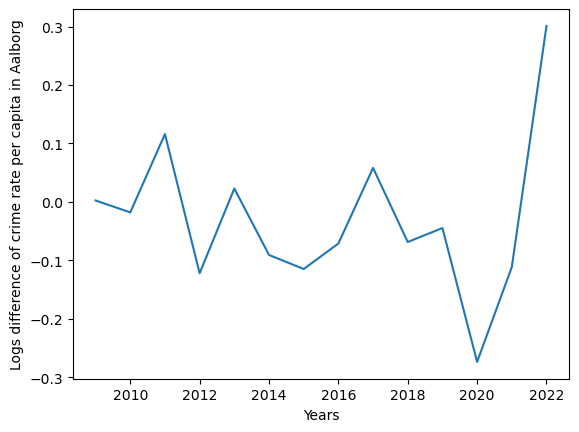

In [403]:
# Taking log of crime rate per capita and population for Aalborg
aalborg=total.loc[total["municipalities"] == "Aalborg"] # Assign all rows that contains Aalborg from our merged data "total".

# Taking logs of crime rate per capita in Aalborg
log_crpc_aalborg = np.log(aalborg.crime_rate_per_cap)
# Taking logs difference
log_diff_crpc_aalborg = log_crpc_aalborg.diff().dropna()
# Including years in logs difference to compute plot. Note: excludes first row.
log_diff_crpc_aalborg.index= aalborg["year"][1:]

## Doing the same for population in Aalborg
log_pop_aalborg = np.log(aalborg.pop_)
log_diff_pop_aalborg = log_pop_aalborg.diff().dropna()
log_diff_pop_aalborg.index= aalborg["year"][1:]



plt.plot(log_diff_crpc_aalborg)
plt.xlabel("Years")
plt.ylabel("Logs difference of crime rate per capita in Aalborg")

Text(0, 0.5, 'Logs difference of population in Aalborg')

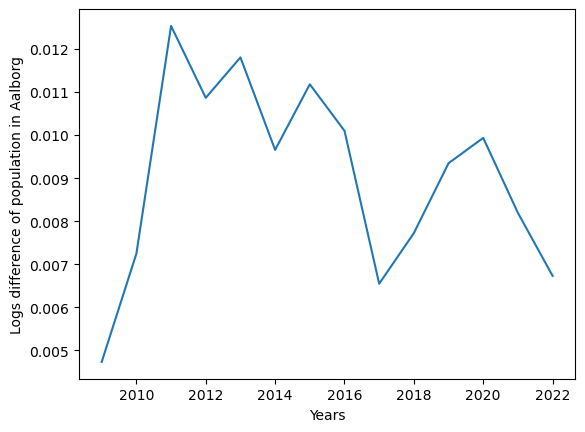

In [404]:
# Plotting for logs difference of populaton in Aalborg
plt.plot(log_diff_pop_aalborg)
plt.xlabel("Years")
plt.ylabel("Logs difference of population in Aalborg")

# Conclusion

ADD CONCISE CONLUSION.